<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


The dataset chosen for this analysis contains Black Friday sales predictions. It includes numerical features like product categories, purchase values and categorical features like occupation, marital status, gender and age. The target variable is "Purchase".

In [4]:
df.shape

(550068, 12)

In [5]:
# statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


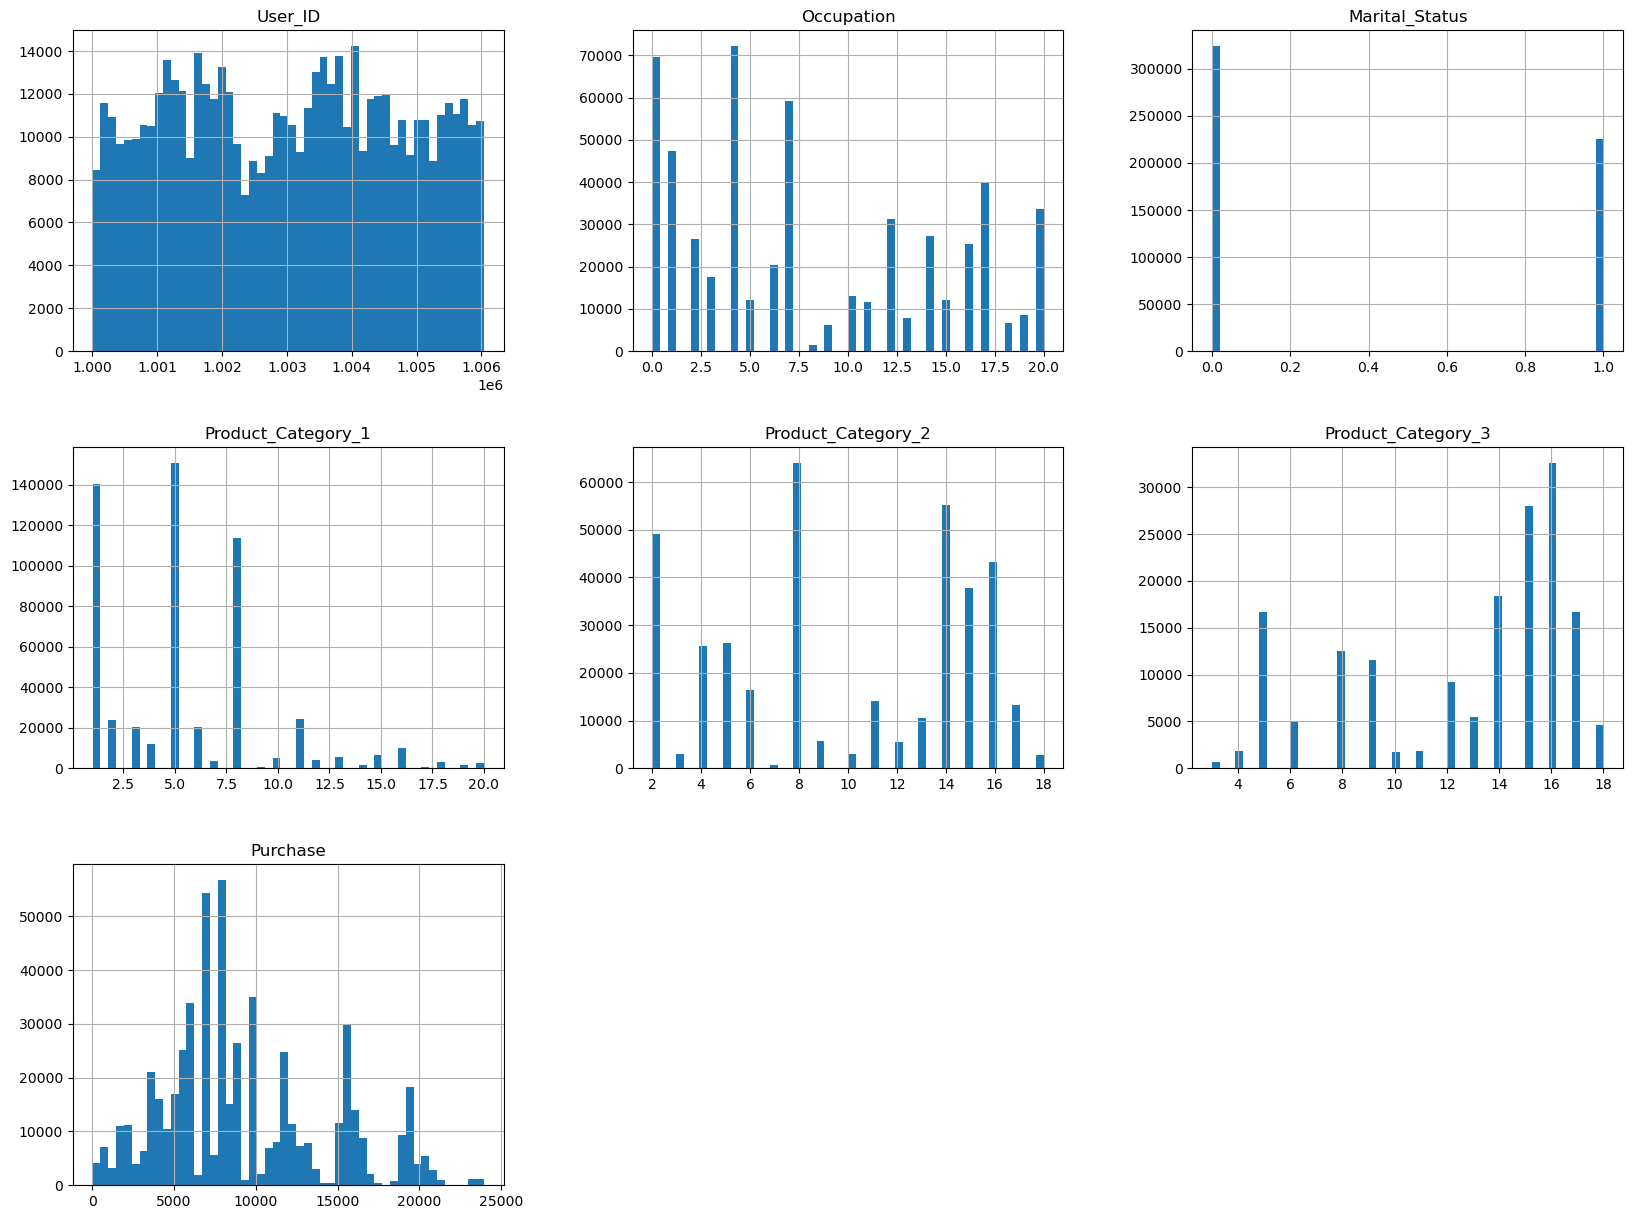

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# find unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [9]:
# Exploratory Data Analysis and Preprocessing

During data exploration and preprocessing steps, I examined the distribution of each feature, checked for missing values, and looked for potential outliers. Data cleaning involved handling missing values, removing outliers if necessary, and encoding categorical variables if applicable. Feature engineering in the later step of training included creating polynomial features to capture non-linear relationships between predictors and the target variable.

<Axes: xlabel='Purchase', ylabel='Density'>

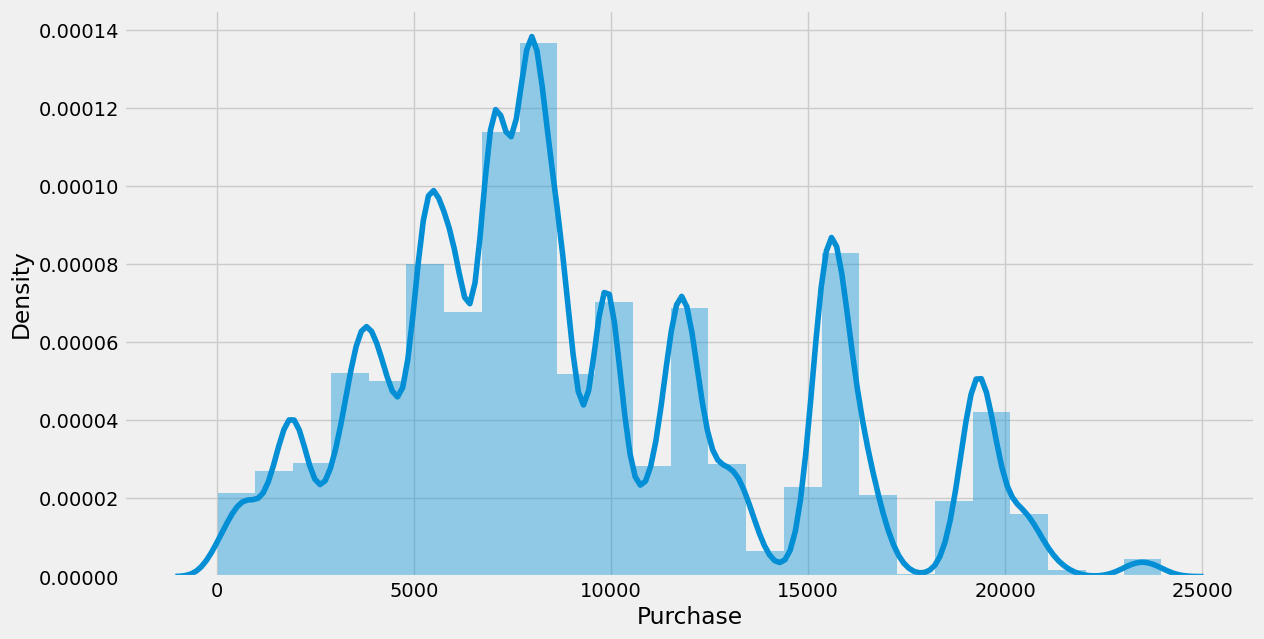

In [10]:
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25)

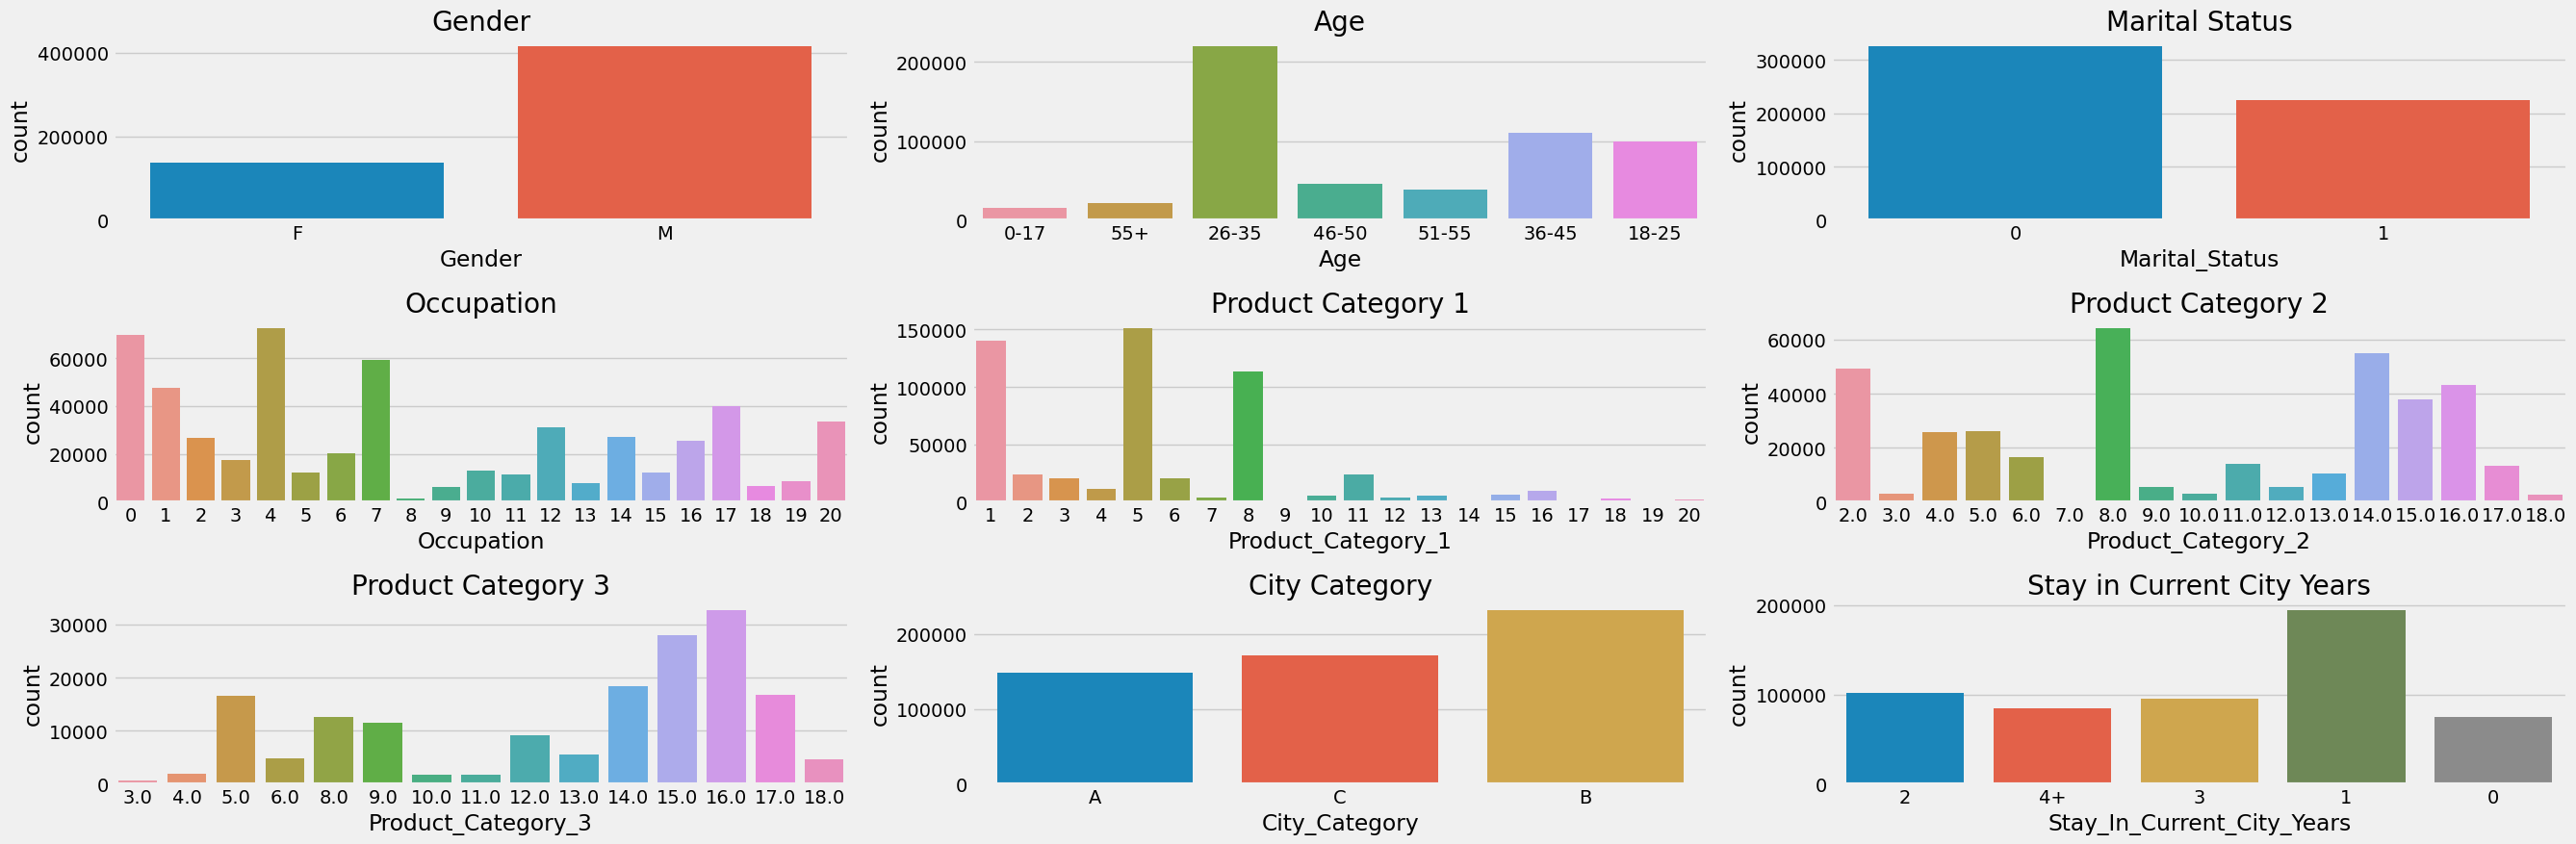

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(27, 9))
axes = axes.flatten()

# Plot countplots for each feature in its corresponding subplot
sns.countplot(x=df['Gender'], ax=axes[0])
axes[0].set_title('Gender')

sns.countplot(x=df['Age'], ax=axes[1])
axes[1].set_title('Age')

sns.countplot(x=df['Marital_Status'], ax=axes[2])
axes[2].set_title('Marital Status')

sns.countplot(x=df['Occupation'], ax=axes[3])
axes[3].set_title('Occupation')

sns.countplot(x=df['Product_Category_1'], ax=axes[4])
axes[4].set_title('Product Category 1')

sns.countplot(x=df['Product_Category_2'], ax=axes[5])
axes[5].set_title('Product Category 2')

sns.countplot(x=df['Product_Category_3'], ax=axes[6])
axes[6].set_title('Product Category 3')

sns.countplot(x=df['City_Category'], ax=axes[7])
axes[7].set_title('City Category')

sns.countplot(x=df['Stay_In_Current_City_Years'], ax=axes[8])
axes[8].set_title('Stay in Current City Years')

plt.tight_layout()
plt.show()

In [12]:
# check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [13]:
# fill the null values with the float value of -2.0
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [14]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
# Handling outliers on the numeric columns, by using the Interquartile Method
numeric_cols = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    df.loc[df[column] > upper_limit, column] = upper_limit

# Feature scaling/normalization on the numeric columns with Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [16]:
# encoding values using dict
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,-0.613271,-1.169715,-0.625224,8370
1,1000001,P00248942,0,0-17,10,A,2,0,-1.125214,-0.015026,1.623536,15200
2,1000001,P00087842,0,0-17,10,A,2,0,1.690470,-1.169715,-0.625224,1422
3,1000001,P00085442,0,0-17,10,A,2,0,1.690470,1.139663,-0.625224,1057
4,1000002,P00285442,1,55+,16,C,4+,0,0.666585,-1.169715,-0.625224,7969


In [17]:
# to improve the metric use one hot encoding
# label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,-0.613271,-1.169715,-0.625224,8370
1,1000001,P00248942,0,0,10,0,2,0,-1.125214,-0.015026,1.623536,15200
2,1000001,P00087842,0,0,10,0,2,0,1.690470,-1.169715,-0.625224,1422
3,1000001,P00085442,0,0,10,0,2,0,1.690470,1.139663,-0.625224,1057
4,1000002,P00285442,1,6,16,2,4,0,0.666585,-1.169715,-0.625224,7969


# 2. Objectives


The main objective of this analysis is to develop linear regression models to predict the target variable accurately while maintaining interpretability. The focus is primarily on prediction, but it's essential to understand the relationships between the predictors and the target variable for interpretability purposes.

In [18]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,-0.613271,-1.169715,-0.625224,8370
1,1000001,P00248942,0,0,10,0,2,0,-1.125214,-0.015026,1.623536,15200
2,1000001,P00087842,0,0,10,0,2,0,1.690470,-1.169715,-0.625224,1422
3,1000001,P00085442,0,0,10,0,2,0,1.690470,1.139663,-0.625224,1057
4,1000002,P00285442,1,6,16,2,4,0,0.666585,-1.169715,-0.625224,7969


In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import numpy as np

In [20]:
def train_and_evaluate(model, X, y):
    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

    # feature scaling
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # fit the model
    model.fit(x_train_scaled, y_train)

    # predict the results
    pred = model.predict(x_test_scaled)

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    # evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)

    print("Results for", type(model).__name__)
    print("RMSE:", rmse)
    print("CV Score:", np.sqrt(cv_score))
    print("R^2 Score:", r2)

# 3. Linear Regression Models


In [21]:
# Simple Linear Regression
print("Simple Linear Regression:")
simple_lr_model = LinearRegression()
train_and_evaluate(simple_lr_model, X, y)

Simple Linear Regression:
Results for LinearRegression
RMSE: 4626.772914860575
CV Score: 4627.67793113987
R^2 Score: 0.1505914668248658


In [22]:
from itertools import combinations_with_replacement

# Linear Regression with Polynomial Features Applied
print("Linear Regression with Polynomial Features Applied:")
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Generate polynomial feature names
n_features = X.shape[1]
feature_names = ['intercept']
for i in range(n_features):
    feature_names.append('x%d' % (i + 1))
for degree in range(2, poly.degree + 1):
    for comb in combinations_with_replacement(range(n_features), degree):
        feature_names.append(''.join(''.join('x%d' % (j + 1) for j in comb)))

# Create DataFrame with polynomial features
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Fit and evaluate the polynomial regression model
poly_lr_model = LinearRegression()
train_and_evaluate(poly_lr_model, X_poly_df, y)


Linear Regression with Polynomial Features Applied:
Results for LinearRegression
RMSE: 4393.693970579387
CV Score: 4486.636425195259
R^2 Score: 0.2340157165146548


In [23]:
# Ridge Regression
print("Ridge Regression:")
ridge_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid_search = GridSearchCV(Ridge(), ridge_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X, y)
print("Best Ridge Regression Model:", ridge_grid_search.best_params_)
best_ridge_model = ridge_grid_search.best_estimator_
train_and_evaluate(best_ridge_model, X, y)


Ridge Regression:
Best Ridge Regression Model: {'alpha': 0.01}
Results for Ridge
RMSE: 4626.772914694865
CV Score: 4627.677931183812
R^2 Score: 0.15059146688570968


In [24]:
# Lasso Regression
print("Lasso Regression:")
lasso_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid_search = GridSearchCV(Lasso(), lasso_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X, y)
print("Best Lasso Regression Model:", lasso_grid_search.best_params_)
best_lasso_model = lasso_grid_search.best_estimator_
train_and_evaluate(best_lasso_model, X, y)


Lasso Regression:
Best Lasso Regression Model: {'alpha': 0.01}
Results for Lasso
RMSE: 4626.772904089403
CV Score: 4627.677973608795
R^2 Score: 0.15059147077972834


Summary of Linear Regression Models:

Four linear regression models were trained and evaluated:

Simple Linear Regression Model: This model served as the baseline and used the original features without any modifications.

Linear Regression Model with Polynomial Features Applied: Polynomial features up to the second degree were added to the original features to capture non-linear relationships.

Regularization Regression Models (Ridge and Lasso Regression): Ridge and Lasso regressions was applied to mitigate multicollinearity and overfitting by introducing regularization.

Recommendation for Final Model:
Based on the results, the polynomial regression model appears to be the most suitable final model. It achieved the lowest root mean squared error (RMSE) and a relatively higher coefficient of determination (R^2 score) compared to the other models. Moreover, the polynomial regression model captures non-linear relationships between predictors and the target variable, enhancing its predictive performance. Additionally, its coefficients can provide insights into the importance of different features in predicting the target variable.

# 4. Insights and key findings


The polynomial regression model outperforms the other models in terms of predictive accuracy.

Adding polynomial features improves the model's ability to capture complex relationships between predictors and the target variable.

Regularization techniques like Ridge and Lasso regression did not significantly improve the model's performance in this case.

# 5. Next Steps


Further feature engineering: I could explore additional feature transformations or interactions to improve the model's explanatory power.

Ensemble methods: I can apply ensemble methods like random forests or gradient boosting to capture non-linear relationships and interactions more effectively.

Cross-validation: I can implement nested cross-validation to obtain more reliable estimates of model performance and reduce overfitting.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
